In [ ]:
from google.colab import drive
import numpy as np

# Mounting the Google Drive
drive.mount('/content/drive')

# Defining the path to preprocessed data
data_dir = "/content/drive/MyDrive/ML/Preprocessed_Data/"

# Loading the preprocessed datasets
X_train = np.load(data_dir + "X_train_scaled.npy")
X_val = np.load(data_dir + "X_val_scaled.npy")
X_test = np.load(data_dir + "X_test_scaled.npy")
y_train = np.load(data_dir + "y_train.npy")
y_val = np.load(data_dir + "y_val.npy")
y_test = np.load(data_dir + "y_test.npy")

# Combining the training and validation sets for final training
X_train_combined = np.vstack((X_train, X_val))
y_train_combined = np.vstack((y_train, y_val))

# Printing out their shapes for verification
print(f"Training features: {X_train_combined.shape}, Training targets: {y_train_combined.shape}")
print(f"Test features: {X_test.shape}, Test targets: {y_test.shape}")

Mounted at /content/drive
Training features: (70362, 1092), Training targets: (70362, 2)
Test features: (39804, 1092), Test targets: (39804, 2)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initializing the Linear Regression model
linear_model = LinearRegression()

# Training the model on combined training and validation sets
linear_model.fit(X_train_combined, y_train_combined)

# Predicting on the test dataset
y_test_pred = linear_model.predict(X_test)

In [ ]:

# Metrics for Translational Velocity (v)
mse_v = mean_squared_error(y_test[:, 0], y_test_pred[:, 0])
mae_v = mean_absolute_error(y_test[:, 0], y_test_pred[:, 0])
r2_v = r2_score(y_test[:, 0], y_test_pred[:, 0])

# Metrics for Rotational Velocity (w)
mse_w = mean_squared_error(y_test[:, 1], y_test_pred[:, 1])
mae_w = mean_absolute_error(y_test[:, 1], y_test_pred[:, 1])
r2_w = r2_score(y_test[:, 1], y_test_pred[:, 1])

# Printing out the results
print("Linear Regression Model Performance on Test Data:")
print(f"Translational Velocity (v):")
print(f" - MSE: {mse_v:.4f}")
print(f" - MAE: {mae_v:.4f}")
print(f" - R² Score: {r2_v:.4f}")

print(f"Rotational Velocity (w):")
print(f" - MSE: {mse_w:.4f}")
print(f" - MAE: {mae_w:.4f}")
print(f" - R² Score: {r2_w:.4f}")

Linear Regression Model Performance on Test Data:
Translational Velocity (v):
 - MSE: 0.1291
 - MAE: 0.2906
 - R² Score: 0.0618
Rotational Velocity (w):
 - MSE: 0.0705
 - MAE: 0.1790
 - R² Score: -0.0275


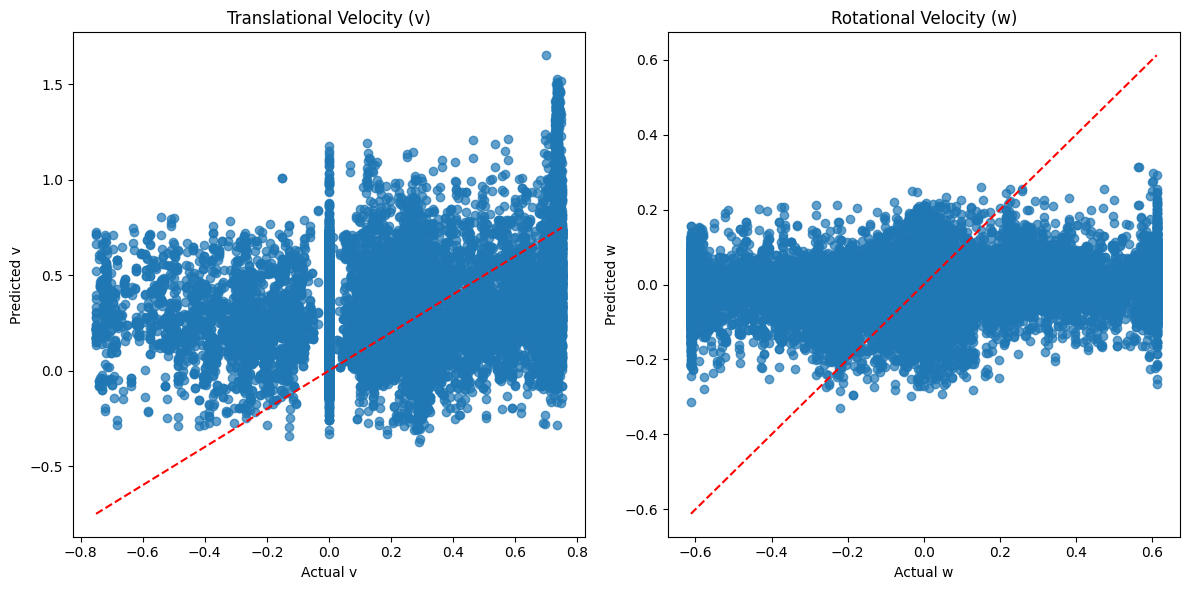

In [ ]:
import matplotlib.pyplot as plt

# Plottin  actual vs predicted for both velocities
plt.figure(figsize=(12, 6))

# Translational velocity (v)
plt.subplot(1, 2, 1)
plt.scatter(y_test[:, 0], y_test_pred[:, 0], alpha=0.7)
plt.plot([y_test[:, 0].min(), y_test[:, 0].max()],
         [y_test[:, 0].min(), y_test[:, 0].max()], 'r--')
plt.xlabel('Actual v')
plt.ylabel('Predicted v')
plt.title('Translational Velocity (v)')

# Rotational velocity (w)
plt.subplot(1, 2, 2)
plt.scatter(y_test[:, 1], y_test_pred[:, 1], alpha=0.7)
plt.plot([y_test[:, 1].min(), y_test[:, 1].max()],
         [y_test[:, 1].min(), y_test[:, 1].max()], 'r--')
plt.xlabel('Actual w')
plt.ylabel('Predicted w')
plt.title('Rotational Velocity (w)')

plt.tight_layout()
plt.show()